Load and plot distribution


In [18]:
# imports
import os
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np

from utils.trial_data import TrialData

In [19]:
# load and plot distributions
WORK_DIR = '/home/turtlewizard/repos/thesis-mppi-model-ident/evaluation/01_distribution_100'
waffle_data_path = WORK_DIR + '/waffle_data.pkl'
burger_data_path = WORK_DIR + '/burger_data.pkl'
enjoy_data_path = WORK_DIR + '/enjoy_data.pkl'
enjoy2_path = WORK_DIR + '/enjoy2_data.pkl'

# load data
waffle_data: TrialData = pickle.load(open(waffle_data_path, 'rb'))
burger_data: TrialData = pickle.load(open(burger_data_path, 'rb'))
enjoy_data: TrialData = pickle.load(open(enjoy_data_path, 'rb'))
enjoy2_data: TrialData = pickle.load(open(enjoy2_path, 'rb'))

trial_datas = {
    'waffle': waffle_data,
    'burger': burger_data,
    'enjoy': enjoy_data,
    'enjoy2': enjoy2_data,
}

In [20]:
# debug
# print(waffle_data.print_trial_data())
# print(burger_data.print_trial_data())
# print(enjoy_data.print_trial_data())

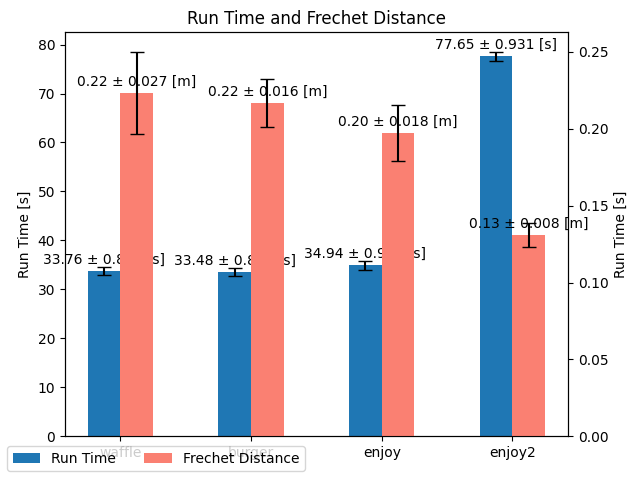

In [21]:
# plot run_time and frechet_distance
def plot_time_frechet(trial_datas):
    labels = list(trial_datas.keys())
    run_time_avg = [t.run_time_avg for t in trial_datas.values()]
    run_time_std = [t.run_time_std for t in trial_datas.values()]

    frechet_distance_avg = [t.frechet_distance_avg for t in trial_datas.values()]
    frechet_distance_std = [t.frechet_distance_std for t in trial_datas.values()]

    x = np.arange(len(labels))
    width = 0.25  # bar width
    fig, ax_time = plt.subplots(num='Run time and Frechet distance')
    bars_time = ax_time.bar(
        x, run_time_avg, width, yerr=run_time_std, capsize=5, label='Run Time')
    ax_time.set_ylabel('Run Time [s]')
    ax_time.tick_params(axis='y')

    ax_frechet = ax_time.twinx()
    bars_frechet = ax_frechet.bar(
        x + width, frechet_distance_avg, width, yerr=frechet_distance_std,
        capsize=5, label='Frechet Distance',
        color='salmon')
    ax_frechet.set_ylabel('Run Time [s]')
    ax_frechet.tick_params(axis='y')

    ax_time.set_title('Run Time and Frechet Distance')
    ax_time.set_xticks(x + width / 2)
    ax_time.set_xticklabels(labels)
    fig.legend(loc='lower left', ncol=2)

    for bars, avg, std in zip(bars_time, run_time_avg, run_time_std):
        ax_time.annotate(
            f'{avg:.2f} \u00B1 {std:.3f} [s]',
            xy=(bars.get_x() + bars.get_width() / 2, avg),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords='offset points',
            ha='center', va='bottom')

    for bars, avg, std in zip(bars_frechet, frechet_distance_avg, frechet_distance_std):
        ax_frechet.annotate(
            f'{avg:.2f} \u00B1 {std:.3f} [m]',
            xy=(bars.get_x() + bars.get_width() / 2, avg),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords='offset points',
            ha='center', va='bottom')

    plt.tight_layout()
    plt.show()


plot_time_frechet(trial_datas)

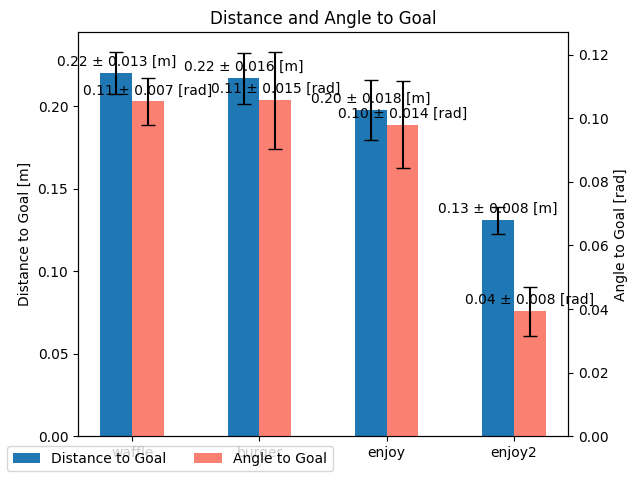

In [22]:
# plot distance_to_goal and angle_to_goal
def plot_distance_angle(trial_datas):
    labels = list(trial_datas.keys())
    distance_to_goal_avg = [t.distance_to_goal_avg for t in trial_datas.values()]
    distance_to_goal_std = [t.distance_to_goal_std for t in trial_datas.values()]

    angle_to_goal_avg = [t.angle_to_goal_avg for t in trial_datas.values()]
    angle_to_goal_std = [t.angle_to_goal_std for t in trial_datas.values()]

    x = np.arange(len(labels))
    width = 0.25  # bar width
    fig, ax_distance = plt.subplots(num='Distance and Angle to Goal')
    bars_distance = ax_distance.bar(
        x, distance_to_goal_avg, width, yerr=distance_to_goal_std,
        capsize=5, label='Distance to Goal')
    ax_distance.set_ylabel('Distance to Goal [m]')
    ax_distance.tick_params(axis='y')

    ax_angle = ax_distance.twinx()
    bars_angle = ax_angle.bar(
        x + width, angle_to_goal_avg, width, yerr=angle_to_goal_std,
        capsize=5, label='Angle to Goal',
        color='salmon')
    ax_angle.set_ylabel('Angle to Goal [rad]')
    ax_angle.tick_params(axis='y')

    ax_distance.set_title('Distance and Angle to Goal')
    ax_distance.set_xticks(x + width / 2)
    ax_distance.set_xticklabels(labels)
    fig.legend(loc='lower left', ncol=2)

    for bars, avg, std in zip(bars_distance, distance_to_goal_avg, distance_to_goal_std):
        ax_distance.annotate(
            f'{avg:.2f} \u00B1 {std:.3f} [m]',
            xy=(bars.get_x() + bars.get_width() / 2, avg),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords='offset points',
            ha='center', va='bottom')

    for bars, avg, std in zip(bars_angle, angle_to_goal_avg, angle_to_goal_std):
        ax_angle.annotate(
            f'{avg:.2f} \u00B1 {std:.3f} [rad]',
            xy=(bars.get_x() + bars.get_width() / 2, avg),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords='offset points',
            ha='center', va='bottom')

    plt.tight_layout()
    plt.show()


plot_distance_angle(trial_datas)

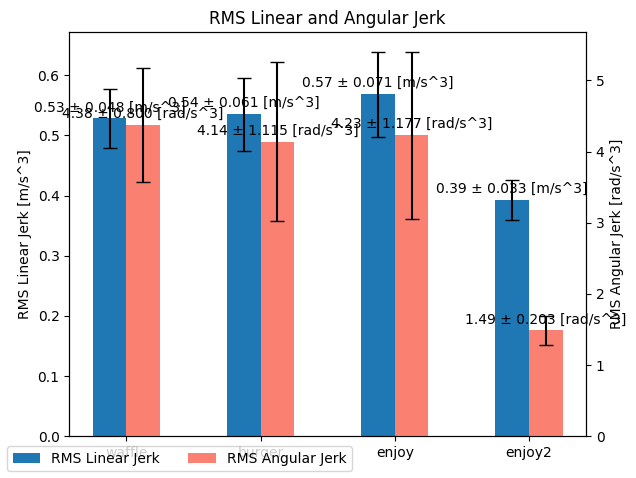

In [23]:
# plot rms_linear_jerk and rms_angular_jerk

def plot_rms(trial_datas):
    labels = list(trial_datas.keys())
    rms_linear_jerk_avg = [t.rms_linear_jerk_avg for t in trial_datas.values()]
    rms_linear_jerk_std = [t.rms_linear_jerk_std for t in trial_datas.values()]

    rms_angular_jerk_avg = [t.rms_angular_jerk_avg for t in trial_datas.values()]
    rms_angular_jerk_std = [t.rms_angular_jerk_std for t in trial_datas.values()]

    x = np.arange(len(labels))
    width = 0.25  # bar width
    fig, ax_linear = plt.subplots(num='RMS Linear and Angular Jerk')
    bars_linear = ax_linear.bar(
        x, rms_linear_jerk_avg, width, yerr=rms_linear_jerk_std,
        capsize=5, label='RMS Linear Jerk')
    ax_linear.set_ylabel('RMS Linear Jerk [m/s^3]')
    ax_linear.tick_params(axis='y')

    ax_angular = ax_linear.twinx()
    bars_angular = ax_angular.bar(
        x + width, rms_angular_jerk_avg, width, yerr=rms_angular_jerk_std,
        capsize=5, label='RMS Angular Jerk',
        color='salmon')
    ax_angular.set_ylabel('RMS Angular Jerk [rad/s^3]')
    ax_angular.tick_params(axis='y')

    ax_linear.set_title('RMS Linear and Angular Jerk')
    ax_linear.set_xticks(x + width / 2)
    ax_linear.set_xticklabels(labels)
    fig.legend(loc='lower left', ncol=2)

    for bars, avg, std in zip(bars_linear, rms_linear_jerk_avg, rms_linear_jerk_std):
        ax_linear.annotate(
            f'{avg:.2f} \u00B1 {std:.3f} [m/s^3]',
            xy=(bars.get_x() + bars.get_width() / 2, avg),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords='offset points',
            ha='center', va='bottom')

    for bars, avg, std in zip(bars_angular, rms_angular_jerk_avg, rms_angular_jerk_std):
        ax_angular.annotate(
            f'{avg:.2f} \u00B1 {std:.3f} [rad/s^3]',
            xy=(bars.get_x() + bars.get_width() / 2, avg),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords='offset points',
            ha='center', va='bottom')

    plt.tight_layout()
    plt.show()


plot_rms(trial_datas)

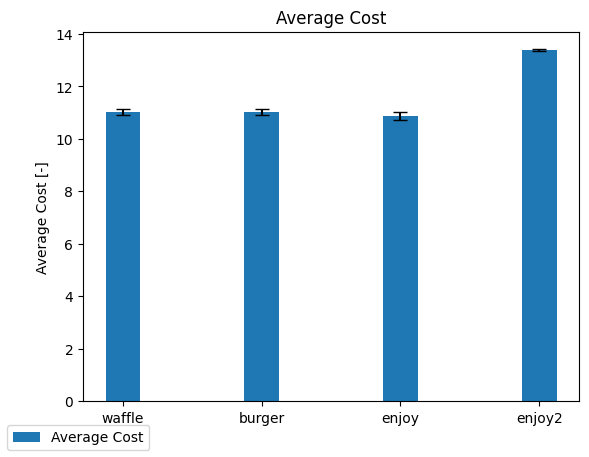

In [25]:
# plot avg_cost
def plot_avg_cost(trial_datas):
    labels = list(trial_datas.keys())
    avg_cost_avg = [t.avg_cost_avg for t in trial_datas.values()]
    avg_cost_std = [t.avg_cost_std for t in trial_datas.values()]

    x = np.arange(len(labels))
    width = 0.25  # bar width
    fig, ax_cost = plt.subplots(num='Average Cost')
    bars_cost = ax_cost.bar(
        x, avg_cost_avg, width, yerr=avg_cost_std,
        capsize=5, label='Average Cost')
    ax_cost.set_ylabel('Average Cost [-]')
    ax_cost.tick_params(axis='y')

    ax_cost.set_title('Average Cost')
    ax_cost.set_xticks(x)
    ax_cost.set_xticklabels(labels)
    fig.legend(loc='lower left', ncol=2)


plot_avg_cost(trial_datas)

In [7]:
# next compare random distribution with the default distribution

# load and plot distributions
WORK_DIR_DIST = '/home/turtlewizard/repos/thesis-mppi-model-ident/evaluation/01_distribution_100'
waffle_data_path = WORK_DIR_DIST + '/waffle_data.pkl'

WORK_DIR_RAND = '/home/turtlewizard/repos/thesis-mppi-model-ident/evaluation/02_random'
waffle_random_data_path = WORK_DIR_RAND + '/waffle_random_data.pkl'

# load data
waffle_data: TrialData = pickle.load(open(waffle_data_path, 'rb'))
waffle_random_data: TrialData = pickle.load(open(waffle_random_data_path, 'rb'))

trial_datas2 = {
    'waffle-default': waffle_data,
    'waffle-random': waffle_random_data,
}

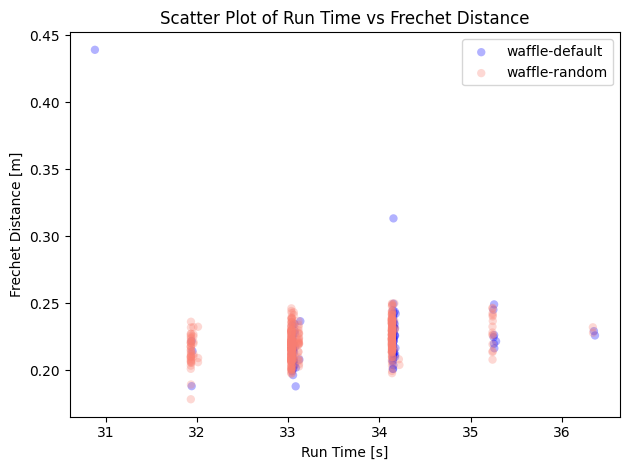

In [ ]:
# create a scatter plot
def scatter_time_frechet(trial_datas):
    labels = list(trial_datas.keys())
    colors = ['blue', 'salmon']

    fig, ax = plt.subplots()
    for i, trial in enumerate(trial_datas.values()):
        x = trial.run_time
        y = trial.frechet_distance
        ax.scatter(x, y, label=labels[i], color=colors[i], alpha=0.3, edgecolors='none')

    ax.set_xlabel('Run Time [s]')
    ax.set_ylabel('Frechet Distance [m]')
    ax.set_title('Scatter Plot of Run Time vs Frechet Distance')
    ax.legend()

    plt.tight_layout()
    plt.show()


scatter_time_frechet(trial_datas2)

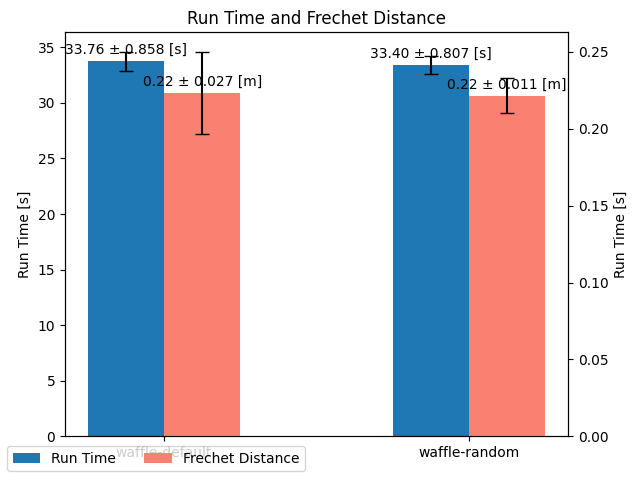

In [ ]:
# plot run_time and frechet_distance
plot_time_frechet(trial_datas2)

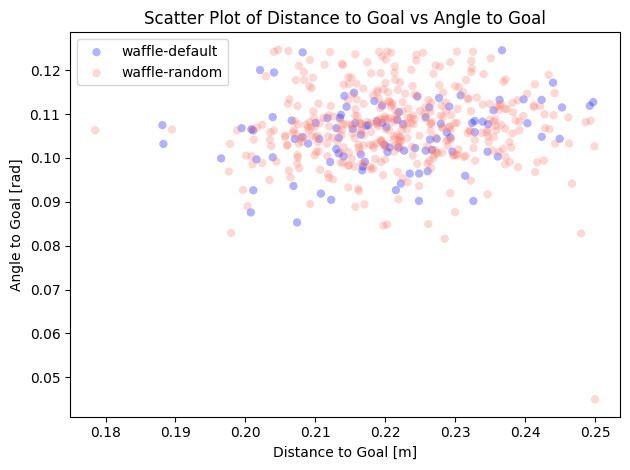

In [ ]:
# create a scatter plot
def scatter_distance_angle(trial_datas):
    labels = list(trial_datas.keys())
    colors = ['blue', 'salmon']

    fig, ax = plt.subplots()
    for i, trial in enumerate(trial_datas.values()):
        x = trial.distance_to_goal
        y = trial.angle_to_goal
        ax.scatter(x, y, label=labels[i], color=colors[i], alpha=0.3, edgecolors='none')

    ax.set_xlabel('Distance to Goal [m]')
    ax.set_ylabel('Angle to Goal [rad]')
    ax.set_title('Scatter Plot of Distance to Goal vs Angle to Goal')
    ax.legend()

    plt.tight_layout()
    plt.show()


scatter_distance_angle(trial_datas2)

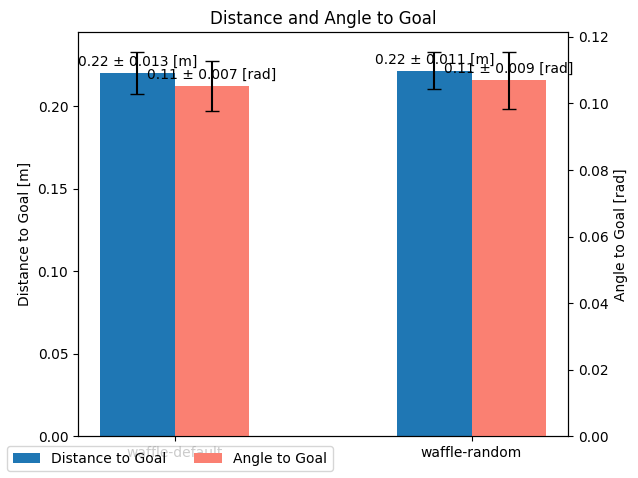

In [ ]:
# plot distance_to_goal and angle_to_goal
plot_distance_angle(trial_datas2)

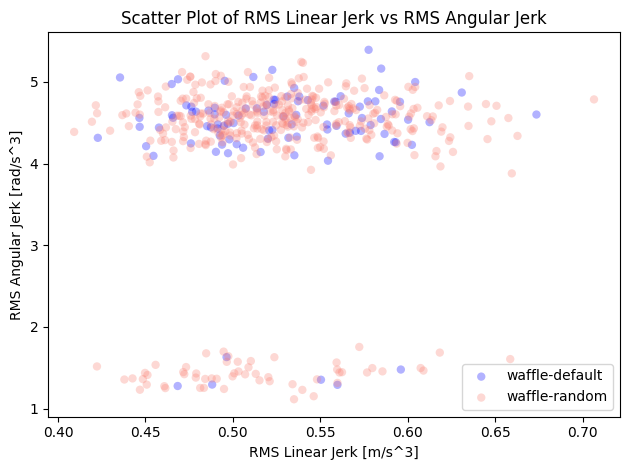

In [ ]:
# create a scatter plot for rms
def scatter_rms(trial_datas):
    labels = list(trial_datas.keys())
    colors = ['blue', 'salmon']

    fig, ax = plt.subplots()
    for i, trial in enumerate(trial_datas.values()):
        x = trial.rms_linear_jerk
        y = trial.rms_angular_jerk
        ax.scatter(x, y, label=labels[i], color=colors[i], alpha=0.3, edgecolors='none')

    ax.set_xlabel('RMS Linear Jerk [m/s^3]')
    ax.set_ylabel('RMS Angular Jerk [rad/s^3]')
    ax.set_title('Scatter Plot of RMS Linear Jerk vs RMS Angular Jerk')
    ax.legend()

    plt.tight_layout()
    plt.show()


scatter_rms(trial_datas2)

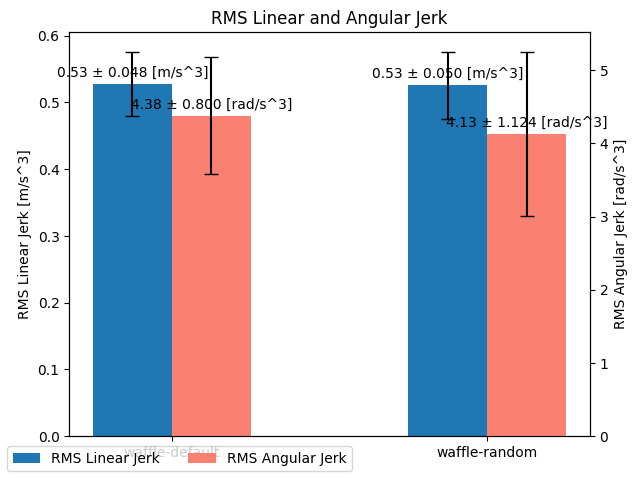

In [ ]:
# plot rms_linear_jerk and rms_angular_jerk
plot_rms(trial_datas2)

/tmp/ipykernel_315704/2434121282.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  critics_df.rename(columns=renamed_columns, inplace=True)


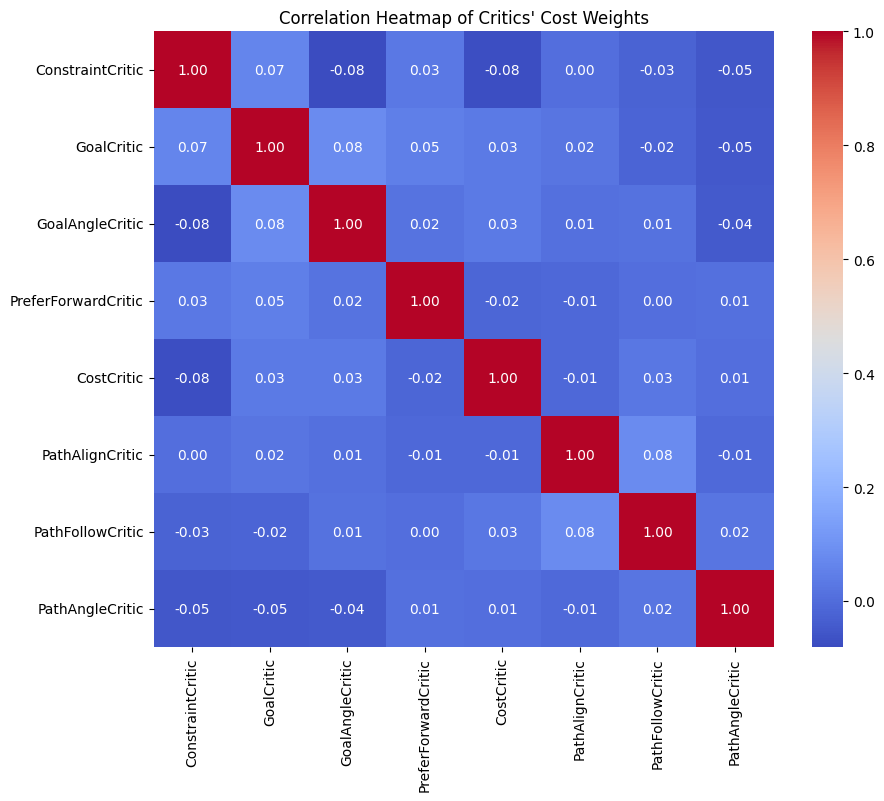

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
file_path = "path_to_your_file.csv"  # Replace with your file path
file_path = '/home/turtlewizard/repos/thesis-mppi-model-ident/evaluation/02_random/waffle_random/final_results.csv'
data = pd.read_csv(file_path)

# Extract cost_weight columns
cost_weight_columns = [col for col in data.columns if "cost_weight" in col]
critics_df = data[cost_weight_columns]

# Rename columns to remove '.cost_weight'
renamed_columns = {col: col.replace(".cost_weight", "") for col in cost_weight_columns}
critics_df.rename(columns=renamed_columns, inplace=True)

# Calculate correlations
correlation_matrix = critics_df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f",
            xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)

# Add titles and labels
plt.title("Correlation Heatmap of Critics' Cost Weights")
plt.show()